___
# __PREPROCESAMIENTO DE LOS DATOS__

In [1]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv(r"C:\Users\Angel Temporal\CANASTA BASICA PROYECTO\DATA SET\canasta_basica_urbana_PREPROCESADO.csv")

# Establecer el número máximo de decimales a mostrar
pd.set_option('display.float_format', '{:,.4f}'.format)


# Mostrar las primeras 60 filas para verificar
df.head()


,AÑO,ARTICULO,GRAMOS POR PERSONAS,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,2001,Pan Francés,49,0.0700,0.0700,0.0700,0.0700,0.0700,0.0600,0.0600,0.0700,0.0600,0.0600,0.0700,0.0700
1,2001,Tortillas,223,0.1100,0.1100,0.1100,0.1100,0.1100,0.1100,0.1200,0.1200,0.1200,0.1200,0.1100,0.1100
2,2001,Arroz,55,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0400,0.0500,0.0500
3,2001,Carnes 1_ /,60,0.2500,0.2500,0.2500,0.2500,0.2500,0.2600,0.2600,0.2600,0.2600,0.2600,0.2600,0.2600
4,2001,Grasas 2 _ /,33,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500,0.0500


___
__NOTA__

El dataset tiene 275 filas y 15 columnas.

Contiene precios mensuales de productos de la canasta básica urbana en columnas de ENERO a DICIEMBRE.

Hay tres columnas adicionales:

AÑO: Año del registro.

ARTICULO: Nombre del producto.

GRAMOS POR PERSONA: Cantidad estimada por persona.
___

__Siguientes pasos__

Para hacer una predicción de precios, debemos:

1. Transformar el dataset a un formato de series temporales.
2. Elegir un producto específico (o analizar todos por separado).
3. Visualizar la tendencia de precios de un producto a lo largo del tiempo.
4. Aplicar un modelo de predicción, como ARIMA o LSTM.

# PAN FRANCES

## Vamos a extraer los datos del Pan Francés convertirlos a una serie temporal y visualizar su tendencia. Luego, implementaremos un modelo de predicción. Primero, transformando el dataset para que tenga un formato adecuado para análisis de series temporales

# 1. CARGAR Y EXPLORAR LOS DATOS 

Permitira verificar que los nombres de las columnas sean correctos

In [2]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv(r"C:\Users\Angel Temporal\CANASTA BASICA PROYECTO\DATA SET\canasta_basica_urbana_PREPROCESADO.csv")

# Ver las columnas del dataset
df.columns


Index(['AÑO', 'ARTICULO', 'GRAMOS POR PERSONAS', 'ENERO', 'FEBRERO', 'MARZO',
       'ABRIL', 'MAYO', 'JUNIO', 'JULIO', 'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE',
       'NOVIEMBRE', 'DICIEMBRE'],
      dtype='object')

# __2. FILTRAR LOS DATOS DE PAN FRANCES__
Así nos aseguramos de que solo estamos trabajando solo con el producto que nos interesa.


In [3]:
# Filtrar solo el Pan Francés
df_pan = df[df["ARTICULO"] == "Pan Francés"].copy()


#df.drop(264, inplace=True)
df_pan = df_pan.drop(264, axis=0)

# Verificar el dataset filtrado

df_pan.head(25)


,AÑO,ARTICULO,GRAMOS POR PERSONAS,ENERO,FEBRERO,MARZO,ABRIL,MAYO,JUNIO,JULIO,AGOSTO,SEPTIEMBRE,OCTUBRE,NOVIEMBRE,DICIEMBRE
0,2001,Pan Francés,49,0.0700,0.0700,0.0700,0.0700,0.0700,0.0600,0.0600,0.0700,0.0600,0.0600,0.0700,0.0700
11,2002,Pan Francés,49,0.0700,0.0600,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700
22,2003,Pan Francés,49,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0800
33,2004,Pan Francés,49,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0800,0.0800
44,2005,Pan Francés,49,0.0800,0.0700,0.0800,0.0700,0.0700,0.0700,0.0700,0.0700,0.0700,0.0800,0.0800,0.0800
55,2006,Pan Francés,49,0.0800,0.0700,0.0800,0.0800,0.0700,0.0800,0.0800,0.0700,0.0800,0.0800,0.0800,0.0800
66,2007,Pan Francés,49,0.0700,0.0800,0.0800,0.0800,0.0800,0.0800,0.0800,0.0800,0.0800,0.0800,0.0900,0.0900
77,2008,Pan Francés,49,0.0900,0.1000,0.1100,0.1100,0.1100,0.1200,0.1200,0.1200,0.1200,0.1100,0.1100,0.1100
88,2009,Pan Francés,49,0.1100,0.1200,0.1200,0.1100,0.1100,0.1100,0.1100,0.1100,0.1100,0.1100,0.1200,0.1100
99,2010,Pan Francés,49,0.1100,0.1100,0.1000,0.1100,0.1100,0.1100,0.1100,0.1100,0.1100,0.1100,0.1100,0.1100


# 3. CONVERTIR LOS DATOS A FORMATO DE SERIES TEMPORALES

In [15]:
import pandas as pd

# Asegúrate de cargar el DataFrame 'df_pan' antes de ejecutar este código

# Transformar de formato ancho (varias columnas de meses) a largo (fecha única)
df_pan_melted = df_pan.melt(id_vars=["AÑO", "ARTICULO"], 
                            value_vars=["ENERO", "FEBRERO", "MARZO", "ABRIL", "MAYO", "JUNIO", 
                                        "JULIO", "AGOSTO", "SEPTIEMBRE", "OCTUBRE", "NOVIEMBRE", "DICIEMBRE"],
                            var_name="MES", value_name="PRECIO")

# Mapeo de nombres de meses a números
meses_dict = {
    "ENERO": 1, "FEBRERO": 2, "MARZO": 3, "ABRIL": 4, "MAYO": 5, "JUNIO": 6,
    "JULIO": 7, "AGOSTO": 8, "SEPTIEMBRE": 9, "OCTUBRE": 10, "NOVIEMBRE": 11, "DICIEMBRE": 12
}

# Convertir los nombres de los meses a números
df_pan_melted["MES"] = df_pan_melted["MES"].map(meses_dict)

# Crear la columna de fecha
df_pan_melted["FECHA"] = pd.to_datetime(df_pan_melted["AÑO"].astype(str) + "-" + df_pan_melted["MES"].astype(str) + "-01")

# Ordenar por fecha y eliminar columnas innecesarias
df_pan_melted = df_pan_melted.sort_values("FECHA")[["FECHA", "PRECIO"]]

# Reiniciar el índice
df_pan_melted.reset_index(drop=True, inplace=True)

df_pan_melted.index = df_pan_melted.index + 1


# Mostrar los primeros registros 
df_pan_melted.head()


,FECHA,PRECIO
1,2001-01-01,0.0700
2,2001-02-01,0.0700
3,2001-03-01,0.0700
4,2001-04-01,0.0700
5,2001-05-01,0.0700


In [16]:
#VERIFICACION CORRECTA DE LAS SERIES TEMPORALES
df_pan_melted


,FECHA,PRECIO
1,2001-01-01,0.0700
2,2001-02-01,0.0700
3,2001-03-01,0.0700
4,2001-04-01,0.0700
5,2001-05-01,0.0700
...,...,...
284,2024-08-01,0.1656
285,2024-09-01,0.1626
286,2024-10-01,0.1656
287,2024-11-01,0.1679


# 4. GRAFICAR LA EVOLUCION DEL PRECIO DEL PAN FRANCES

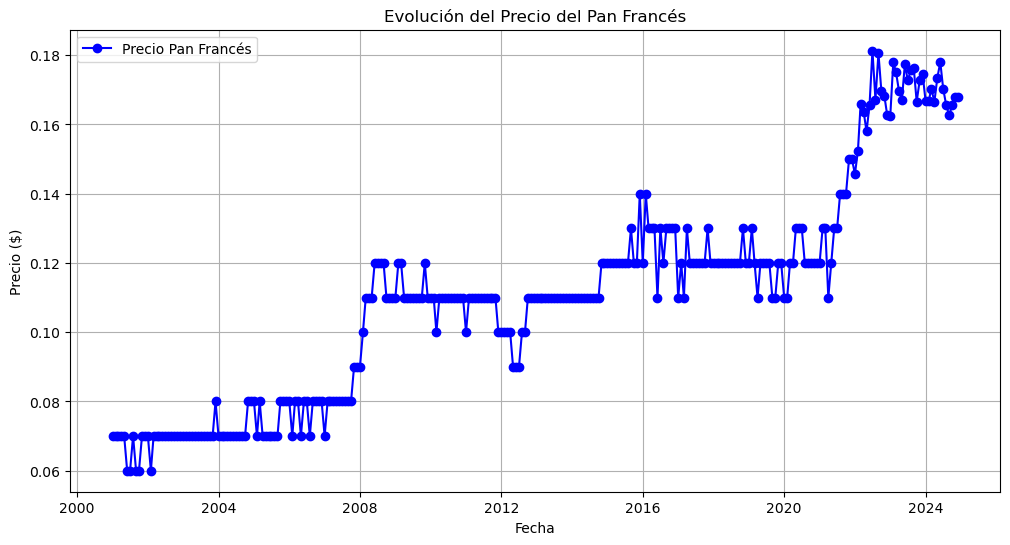

In [18]:
import matplotlib.pyplot as plt

# Graficar la serie temporal
plt.figure(figsize=(12,6))
plt.plot(df_pan_melted["FECHA"], df_pan_melted["PRECIO"], marker="o", linestyle="-", color="b", label="Precio Pan Francés")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.title("Evolución del Precio del Pan Francés")
plt.legend()
plt.grid()
plt.show()


# __Análisis de la serie temporal__

##  Se observan saltos en el precio, lo que sugiere que no sigue una variación completamente       lineal.

##  Hay períodos de estabilidad seguidos de aumentos abruptos.

##  Desde 2020 en adelante, hay más variabilidad y aumentos más frecuentes

___
__NOTA__

 PASO 5. ¿QUE CONTINUA DESPUES DE ESTO?
 
1. Si la tendencia parece estable y con estacionalidad, podemos usar ARIMA para la predicción.

2. Si hay fluctuaciones más complejas, podemos probar con LSTM (red neuronal)

___


__Pasos para aplicar ARIMA__

1. Verificar la estacionariedad de la serie

2. Diferenciar la serie si es necesario

3. Seleccionar los parámetros óptimos para ARIMA

4. Entrenar el modelo y hacer predicciones

5. Evaluar el modelo

___

# 1. VERIFICANDO LA ESTACIONALIDAD DE LA SERIE

In [7]:
from statsmodels.tsa.stattools import adfuller

# Aplicar la prueba de Dickey-Fuller Aumentada (ADF)
resultado_adf = adfuller(df_pan_melted["PRECIO"])

# Mostrar resultados
print("Estadístico de Prueba ADF:", resultado_adf[0])
print("Valor P:", resultado_adf[1])

# Evaluación de estacionariedad
if resultado_adf[1] <= 0.05:
    print("✅ La serie es estacionaria (rechazamos la hipótesis nula).")
else:
    print("⚠️ La serie NO es estacionaria (no podemos rechazar la hipótesis nula). Es necesario diferenciarla.")


Estadístico de Prueba ADF: -0.8575654212547995
Valor P: 0.8016254803270001
⚠️ La serie NO es estacionaria (no podemos rechazar la hipótesis nula). Es necesario diferenciarla.


# 2. Diferenciar la serie si no es estacionaria
Si la serie no es estacionaria, aplicamos una diferenciación para estabilizarla: 


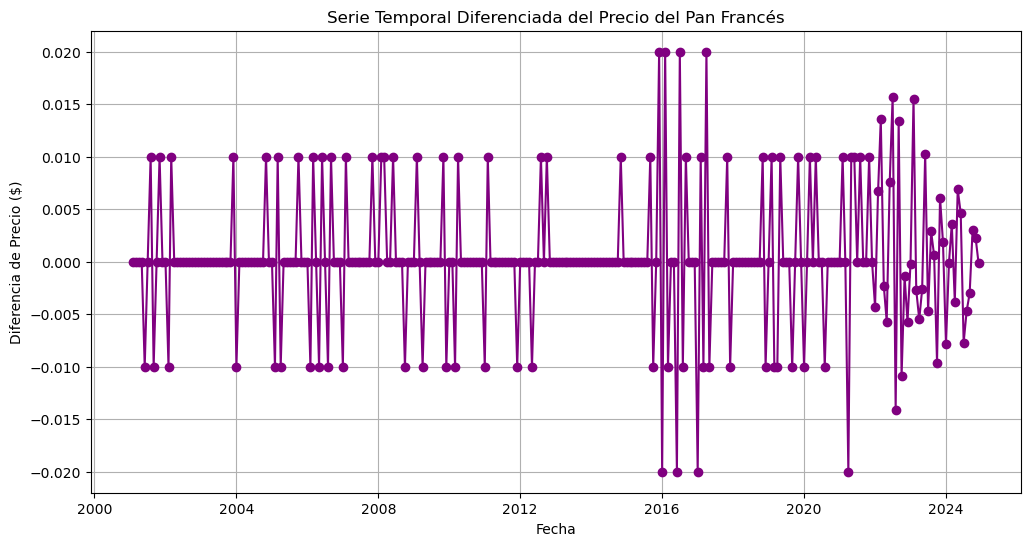

In [8]:
import numpy as np

# Aplicar la primera diferenciación
df_pan_melted["PRECIO_DIFF"] = df_pan_melted["PRECIO"].diff()

# Eliminar valores NaN generados por la diferencia
df_pan_melted.dropna(inplace=True)

# Graficar la serie diferenciada
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df_pan_melted["FECHA"], df_pan_melted["PRECIO_DIFF"], marker="o", linestyle="-", color="purple")
plt.xlabel("Fecha")
plt.ylabel("Diferencia de Precio ($)")
plt.title("Serie Temporal Diferenciada del Precio del Pan Francés")
plt.grid()
plt.show()


# 3. Seleccionar los parámetros óptimos (p, d, q) para ARIMA

Los valores p, d, q se eligen con la función auto_arima():

Esto nos dará los valores óptimos de 

p (autoregresión),

d (diferencias), 

q (media móvil).

In [9]:
from pmdarima import auto_arima

# Encontrar los mejores parámetros para ARIMA automáticamente
modelo_auto = auto_arima(df_pan_melted["PRECIO"], seasonal=False, stepwise=True, trace=True)

# Ver los parámetros óptimos
print("Parámetros óptimos:", modelo_auto.order)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-2126.528, Time=1.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2074.040, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2120.106, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2132.009, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2075.223, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2130.094, Time=0.21 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-2130.113, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-2128.031, Time=0.84 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-2130.449, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.289 seconds
Parámetros óptimos: (0, 1, 1)


# 4. Entrenar el modelo ARIMA y hacer predicciones 

# SOBREAJUSTE !!!

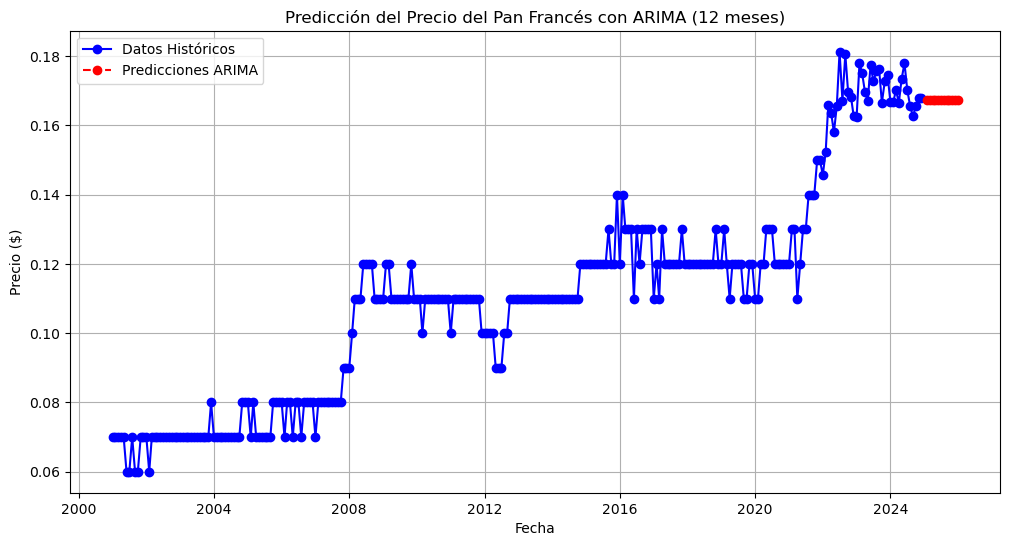

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Definir el modelo con los parámetros encontrados
modelo_arima = ARIMA(df_pan_melted["PRECIO"], order=modelo_auto.order)

# Entrenar el modelo
modelo_entrenado = modelo_arima.fit()

# Definir el número de meses a predecir
meses_a_predecir = 12

# Hacer predicciones para los próximos meses
predicciones = modelo_entrenado.forecast(steps=meses_a_predecir)

# Crear un DataFrame con las predicciones
fechas_futuras = pd.date_range(start=df_pan_melted["FECHA"].max(), periods=meses_a_predecir + 1, freq="ME")[1:]
df_predicciones = pd.DataFrame({"FECHA": fechas_futuras, "PRECIO_PREDICHO": predicciones})

# Graficar los resultados
plt.figure(figsize=(12,6))
plt.plot(df_pan_melted["FECHA"], df_pan_melted["PRECIO"], label="Datos Históricos", marker="o", color="blue")
plt.plot(df_predicciones["FECHA"], df_predicciones["PRECIO_PREDICHO"], label="Predicciones ARIMA", marker="o", color="red", linestyle="dashed")
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.title(f"Predicción del Precio del Pan Francés con ARIMA ({meses_a_predecir} meses)")
plt.legend()
plt.grid()
plt.show()

#  5. Evaluar el modelo
Para medir la precisión del modelo, usamos métricas como MAE (Error Absoluto Medio) y RMSE (Raíz del Error Cuadrático Medio):


In [25]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

# Obtener predicciones en el mismo rango de los datos históricos (validación)
predicciones_historicas = modelo_entrenado.predict(start=0, end=len(df_pan_melted)-1)

# Calcular errores
mae = mean_absolute_error(df_pan_melted["PRECIO"], predicciones_historicas)
rmse = np.sqrt(mean_squared_error(df_pan_melted["PRECIO"], predicciones_historicas))

print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")



MAE (Error Absoluto Medio): 0.0041
RMSE (Raíz del Error Cuadrático Medio): 0.0071


# 6. Gráfica: Datos Reales vs. Predicciones ARIMA
AL PARECER EL MODELO SE SOBREAJUSTO

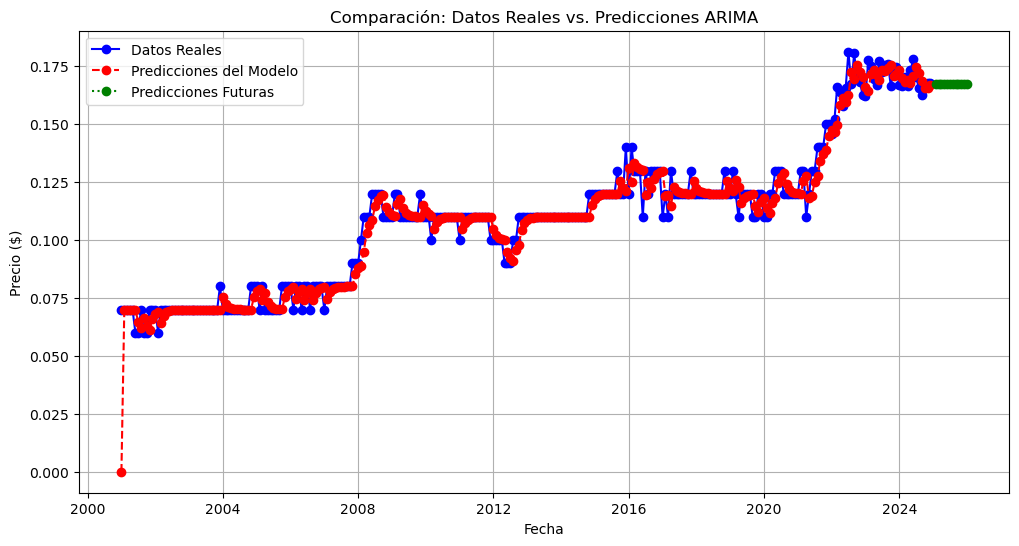

In [26]:
import matplotlib.pyplot as plt

# Obtener predicciones dentro del mismo rango de datos históricos
predicciones_historicas = modelo_entrenado.predict(start=0, end=len(df_pan_melted)-1)

# Graficar datos reales vs. predicciones
plt.figure(figsize=(12,6))
plt.plot(df_pan_melted["FECHA"], df_pan_melted["PRECIO"], label="Datos Reales", marker="o", color="blue")
plt.plot(df_pan_melted["FECHA"], predicciones_historicas, label="Predicciones del Modelo", marker="o", color="red", linestyle="dashed")

# Agregar predicciones futuras
plt.plot(df_predicciones["FECHA"], df_predicciones["PRECIO_PREDICHO"], label="Predicciones Futuras", marker="o", color="green", linestyle="dotted")

# Configuración del gráfico
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.title("Comparación: Datos Reales vs. Predicciones ARIMA")
plt.legend()
plt.grid()
plt.show()


La estabilidad en las predicciones futuras indica que ARIMA prevé un comportamiento estacionario LO CUAL AL ANALIZAR EL MODELO EN UN PERIODO DE TIEMPO MAS LARGO NOTAMOS QUE EL MODELO SE ADAPTO A LOS DATOS lo cual no es bueno.

___
__NOTA__
Si hay mucha diferencia entre los valores reales y predichos, podríamos probar otro enfoque (como LSTM).
___

1. Corregir la predicción anómala en el año 2000.
2. Probar otro modelo como LSTM, que puede capturar mejor patrones no lineales.
3. Ajustar parámetros de ARIMA (p, d, q) para ver si mejora la predicción futura

__ajuste__
1. ️Encontrar los mejores valores de (p, d, q) usando autocorrelación (ACF) y parcial (PACF).
2. Probar diferentes combinaciones con una búsqueda en cuadrícula.
3. Evaluar los nuevos resultados (MAE y RMSE) y comparar con el modelo anterior.

Paso 1: Analizar ACF y PACF
gráficos de autocorrelación:

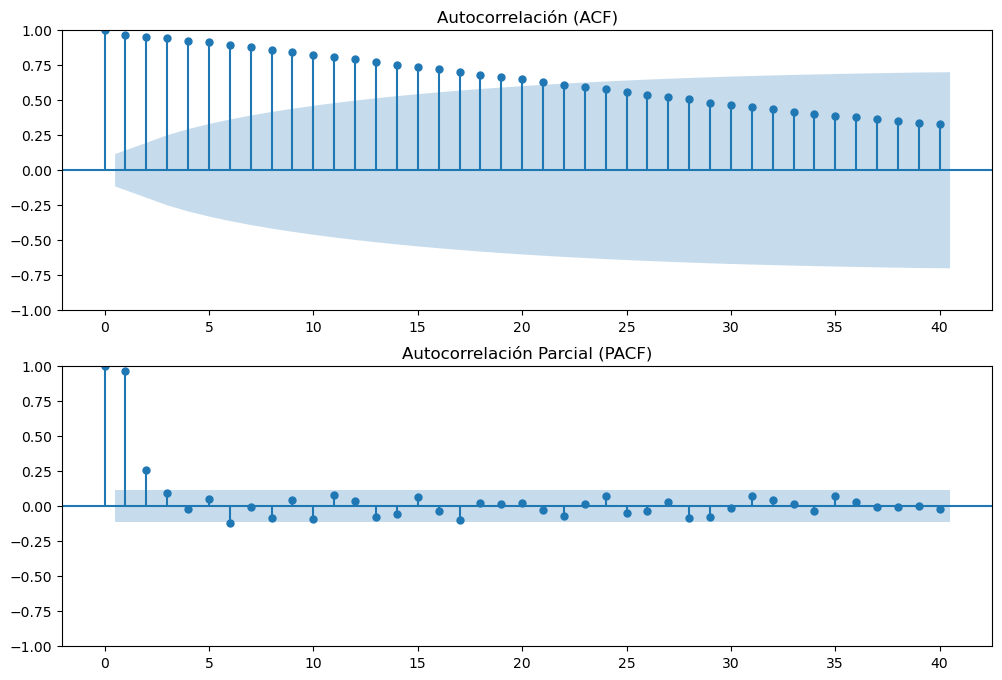

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Graficar ACF y PACF
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(df_pan_melted["PRECIO"], ax=ax[0], lags=40)
ax[0].set_title("Autocorrelación (ACF)")

plot_pacf(df_pan_melted["PRECIO"], ax=ax[1], lags=40)
ax[1].set_title("Autocorrelación Parcial (PACF)")

plt.show()


p (orden autorregresivo): Se elige según los primeros rezagos en PACF que sean significativos.

d (diferenciación): Depende de si la serie es estacionaria o no.

q (orden de media móvil): Se elige según los primeros rezagos en ACF que sean significativos.

# Paso 2: Buscar nuevamente mejores valores (p, d, q)

In [ ]:
# Definir cuántos períodos hacia el futuro queremos predecir
periodos_futuros = 12  # 12 meses (1 año)

# Realizar predicción hacia el futuro
predicciones_futuras = resultado_arima.forecast(steps=periodos_futuros)

# Crear un índice de fechas para las predicciones futuras
import pandas as pd
ultima_fecha = df_pan_melted["FECHA"].max()
fechas_futuras = pd.date_range(start=ultima_fecha, periods=periodos_futuros+1, freq='M')[1:]

# Graficar datos reales + predicciones futuras
plt.figure(figsize=(12,6))
plt.plot(df_pan_melted["FECHA"], df_pan_melted["PRECIO"], marker='o', label="Datos Reales", color='blue')
plt.plot(fechas_futuras, predicciones_futuras, marker='o', linestyle="dashed", label="Predicciones Futuras", color='green')
plt.xlabel("Fecha")
plt.ylabel("Precio ($)")
plt.title("Predicción de Precio del Pan Francés con ARIMA")
plt.legend()
plt.grid()
plt.show()

# Mostrar las predicciones futuras en consola
predicciones_futuras_df = pd.DataFrame({"Fecha": fechas_futuras, "Predicción Precio": predicciones_futuras})
print(predicciones_futuras_df)
